In [25]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy import stats 
from icecream import ic 

filepath="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"

df = pd.read_csv(filepath, header = 0)

In [26]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


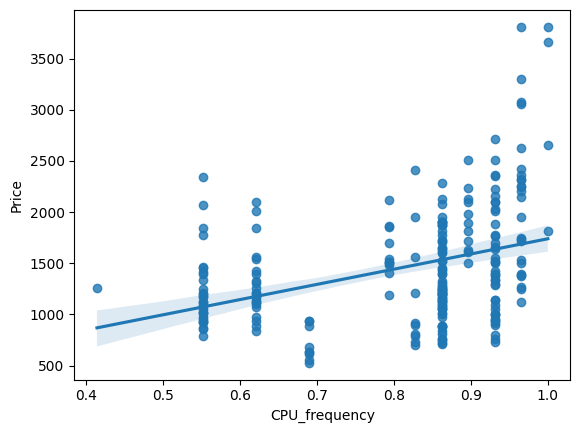

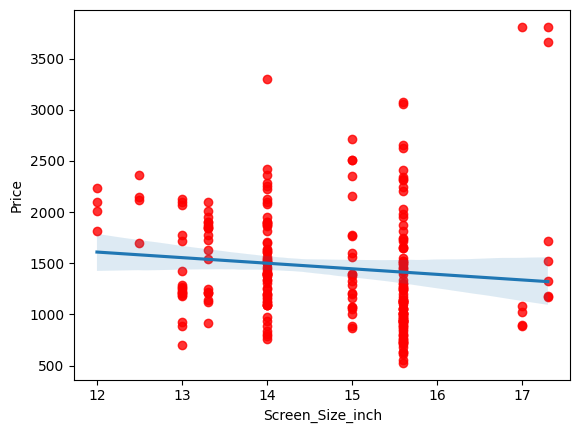

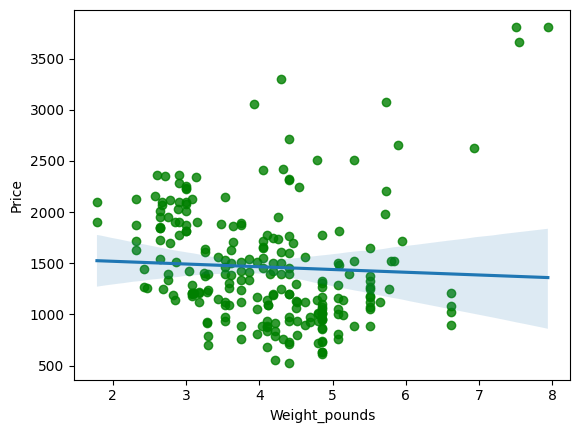

,CPU_frequency,Screen_Size_inch,Weight_pounds,Price
CPU_frequency,1.000000,-0.000948,0.066522,0.366666
Screen_Size_inch,-0.000948,1.000000,0.797534,-0.110644
Weight_pounds,0.066522,0.797534,1.000000,-0.050312
Price,0.366666,-0.110644,-0.050312,1.000000


In [27]:
# "CPU_frequency", "Screen_Size_inch" and "Weight_pounds" against "Price".
sns.regplot(x =  "CPU_frequency", y = "Price", data = df)
plt.show()
sns.regplot(x =  "Screen_Size_inch", y = "Price", data = df, scatter_kws={"color": "red"} )
plt.show()
sns.regplot(x =  "Weight_pounds", y = "Price", data = df, scatter_kws={"color": "green"})
plt.show()

df[[ "CPU_frequency", "Screen_Size_inch", "Weight_pounds", "Price"]].corr()



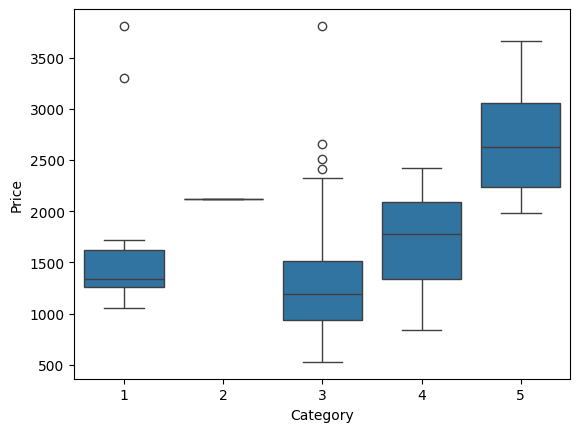

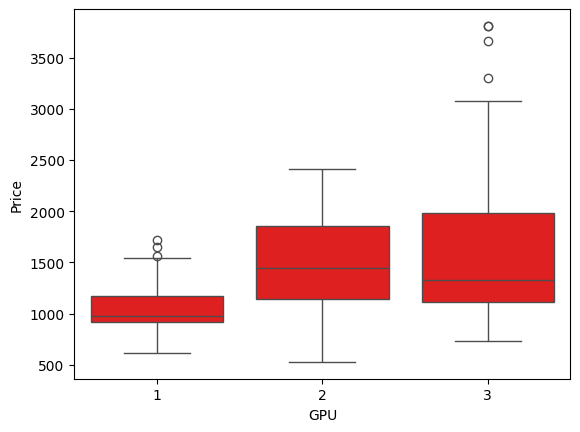

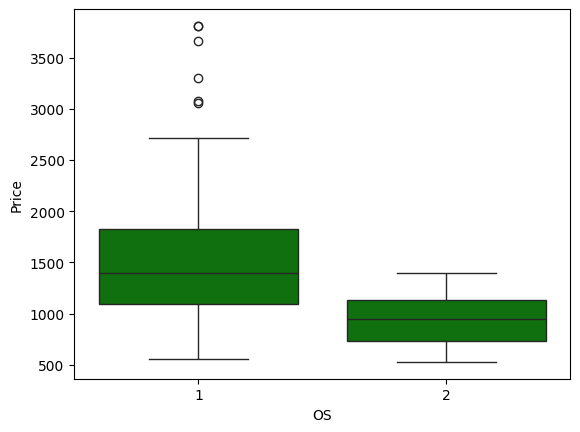

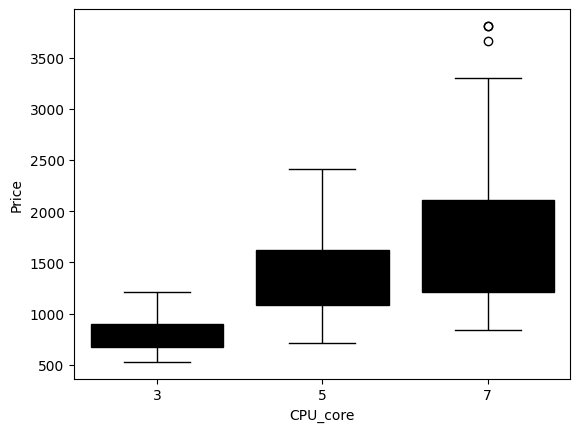

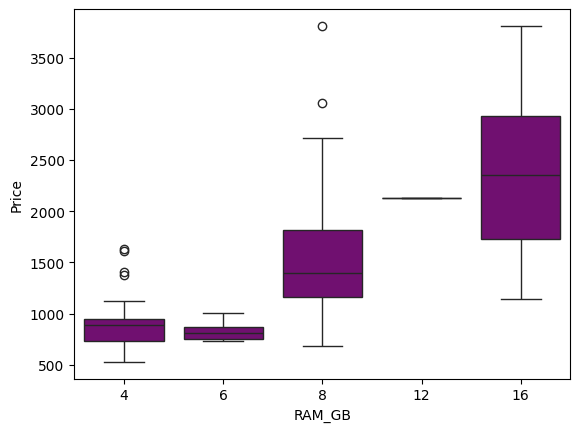

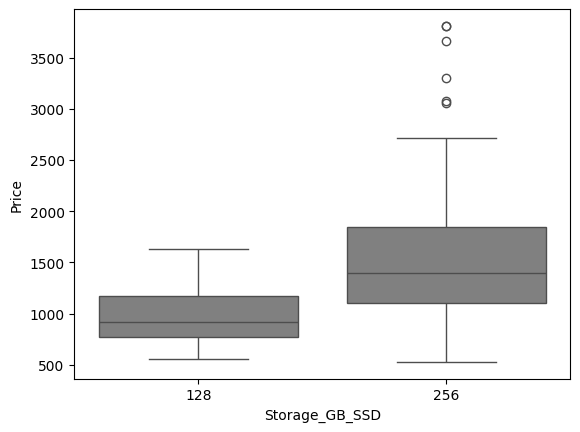

In [28]:
# "Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD"
sns.boxplot(x = 'Category', y = 'Price', data = df)
plt.show()
sns.boxplot(x = 'GPU', y = 'Price', data = df, color = 'red')
plt.show()
sns.boxplot(x = 'OS', y = 'Price', data = df, color = 'green')
plt.show()
sns.boxplot(x = 'CPU_core', y = 'Price', data = df, color = 'black')
plt.show()
sns.boxplot(x = 'RAM_GB', y = 'Price', data = df, color = 'purple')
plt.show()
sns.boxplot(x = 'Storage_GB_SSD', y = 'Price', data = df, color = "gray")
plt.show()

In [29]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Screen-Full_HD,Screen-IPS_panel
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,118.500000,118.500000,3.205882,2.151261,1.058824,5.630252,14.688655,0.813822,7.882353,245.781513,4.106221,1462.344538,0.676471,0.323529
std,68.848868,68.848868,0.776533,0.638282,0.235790,1.241787,1.166045,0.141860,2.482603,34.765316,1.078442,574.607699,0.468809,0.468809
min,0.000000,0.000000,1.000000,1.000000,1.000000,3.000000,12.000000,0.413793,4.000000,128.000000,1.786050,527.000000,0.000000,0.000000
25%,59.250000,59.250000,3.000000,2.000000,1.000000,5.000000,14.000000,0.689655,8.000000,256.000000,3.246863,1066.500000,0.000000,0.000000
50%,118.500000,118.500000,3.000000,2.000000,1.000000,5.000000,15.000000,0.862069,8.000000,256.000000,4.106221,1333.000000,1.000000,0.000000
75%,177.750000,177.750000,4.000000,3.000000,1.000000,7.000000,15.600000,0.931034,8.000000,256.000000,4.851000,1777.000000,1.000000,1.000000
max,237.000000,237.000000,5.000000,3.000000,2.000000,7.000000,17.300000,1.000000,16.000000,256.000000,7.938000,3810.000000,1.000000,1.000000


In [30]:
df.describe(include=['object'])

,Manufacturer,Price-binned
count,238,238
unique,11,3
top,Dell,Low
freq,71,160


In [31]:
grouped_1 = df[["GPU", "CPU_core", "Price"]].groupby(["GPU", "CPU_core"], as_index=False).mean()
grouped_pivot = grouped_1.pivot(index='GPU',columns='CPU_core')
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561

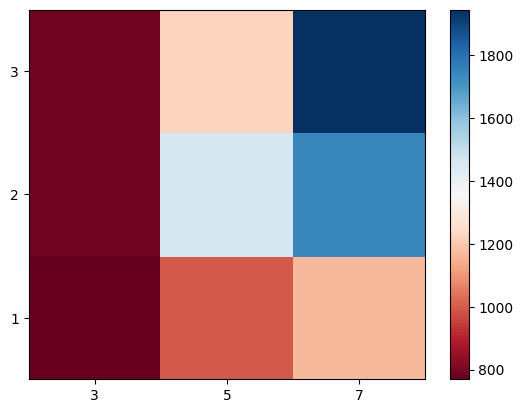

In [32]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

fig.colorbar(im)

In [35]:
ic(stats.pearsonr(df['Category'], df['Price']))
ic(stats.pearsonr(df['GPU'], df['Price']))
ic(stats.pearsonr(df['OS'], df['Price']))
ic(stats.pearsonr(df['CPU_core'], df['Price']))
ic(stats.pearsonr(df['RAM_GB'], df['Price']))
ic(stats.pearsonr(df['Storage_GB_SSD'], df['Price']))
ic(stats.pearsonr(df['Screen_Size_inch'], df['Price']))
ic(stats.pearsonr(df['Weight_pounds'], df['Price']))
ic(stats.pearsonr(df['CPU_frequency'], df['Price']))
ic(stats.pearsonr(df['CPU_frequency'], df['Price']))


# "Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD"

ic| stats.pearsonr(df['Category'], df['Price']): PearsonRResult(statistic=0.28624275581264125, pvalue=7.225696235806733e-06)
ic| stats.pearsonr(df['GPU'], df['Price']): PearsonRResult(statistic=0.2882981988881428, pvalue=6.166949698364282e-06)
ic| stats.pearsonr(df['OS'], df['Price']): PearsonRResult(statistic=-0.22172980114827381, pvalue=0.0005696642559246759)
ic| stats.pearsonr(df['CPU_core'], df['Price']): PearsonRResult(statistic=0.45939777733551157, pvalue=7.912950127009034e-14)
ic| stats.pearsonr(df['RAM_GB'], df['Price']): PearsonRResult(statistic=0.5492972971857842, pvalue=3.6815606288429613e-20)
ic| stats.pearsonr(df['Storage_GB_SSD'], df['Price']): PearsonRResult(statistic=0.2434207552181029, pvalue=0.00014898923191724174)
ic| stats.pearsonr(df['Screen_Size_inch'], df['Price']): PearsonRResult(statistic=-0.11064420817118266, pvalue=0.08853397846830759)
ic| stats.pearsonr(df['Weight_pounds'], df['Price']): PearsonRResult(statistic=-0.05031225837751546, pvalue=0.439769385343389

PearsonRResult(statistic=0.36666555892588604, pvalue=5.5024633507134225e-09)